In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 8.0})
sns.set_context("talk", font_scale=1.0)

#Load file
df = pd.read_csv('data/sapaTempData696items08dec2013thru26jul2014.csv')
df.drop(df.columns[0],1,inplace=True)
df.head()

#Split demographic data and responses
#responses = df.drop(df.columns[0:20],1)
#demographs = df.drop(df.columns[20:],1)

,RID,gender,relstatus,age,marstatus,height,BMI,weight,exer,smoke,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
0,2138157442,female,committed,39,domesticPrtnr,64,21.11,123,more5wk,never,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768368569,female,notCommitted,62,domesticPrtnr,63,19.13,108,1or2wk,never,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,59911536,female,notCommitted,18,neverMarried,60,22.07,113,more5wk,less1mo,...,NaN,NaN,NaN,5,NaN,NaN,NaN,4,5,1
3,208724670,male,notCommitted,21,neverMarried,73,23.48,178,less1wk,less1mo,...,NaN,NaN,NaN,NaN,NaN,3,NaN,6,NaN,NaN
4,2121514443,female,committed,22,neverMarried,65,19.63,118,more5wk,never,...,NaN,NaN,1,NaN,NaN,NaN,NaN,5,6,NaN


In [2]:
X = df.drop(df.columns[0:20],1) #remove demographic info
X.replace({1:-5,2:-3,3:-1,4:1,5:3,6:5},inplace=True) #change from 1-6 scale to -3-3 (excluding 0) scale

XScaled = (X-X.mean(axis=0))/X.std(axis=0) #Pandas handles all these operations in a missing aware away.
XScaled.describe().round(4) #Quick Check to see results of scaling

,q_6,q_20,q_22,q_23,q_26,q_31,q_35,q_38,q_39,q_40,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
count,2514.0000,2441.0000,2713.0000,3605.0000,2311.0000,2476.0000,2431.0000,2468.0000,2529.0000,5998.0000,...,2434.0000,2512.0000,2437.0000,2444.0000,2504.0000,2491.0000,2469.0000,2494.0000,2430.0000,2522.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-3.6404,-2.5415,-1.8489,-1.5144,-1.2122,-1.2576,-1.3396,-2.6527,-2.8068,-1.2795,...,-1.4303,-1.9001,-0.8278,-2.3430,-2.0785,-0.8633,-2.6270,-2.6742,-3.2756,-1.3517
25%,-0.8322,-0.2455,-0.4688,-0.8953,-0.4898,-0.6032,-0.6452,-0.3076,-0.3427,-1.2795,...,-0.6904,-0.5240,-0.8278,-0.2728,-0.6865,-0.8633,-0.4219,-0.3250,-0.0924,-0.7295
50%,0.1039,0.5198,0.2213,0.3430,-0.4898,0.0513,0.0491,0.4742,0.4787,-0.1151,...,0.0496,0.1641,-0.1040,0.4173,0.0095,-0.1326,0.3132,0.4581,0.7035,-0.1073
75%,1.0399,0.5198,0.9114,0.9621,0.9550,0.7057,0.7435,0.4742,0.4787,1.0493,...,0.7895,0.8521,0.6199,1.1074,0.7054,0.5981,1.0483,0.4581,0.7035,0.5149
max,1.0399,1.2852,1.6014,1.5812,2.3998,2.0146,2.1323,1.2559,1.3001,1.6314,...,2.2693,1.5402,2.7913,1.1074,1.4014,2.7901,1.0483,1.2412,0.7035,1.7593


Mean of zero and std of 1 across the board.

In [3]:
# Now fill with zeroes - this lets us use ordinary dot product.
XScaled.fillna(0,inplace=True)
XScaled.head()

,q_6,q_20,q_22,q_23,q_26,q_31,q_35,q_38,q_39,q_40,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
0,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,...,-1.430273,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
1,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,...,0.000000,0,0.000000,0.000000,-2.078451,0.000000,0,0.000000,0.000000,0.000000
2,0,0.519829,0,0.000000,0,0.051277,0.743506,0,0,0.000000,...,0.000000,0,0.000000,0.417319,0.000000,0.000000,0,-0.324974,-0.092355,-1.351719
3,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.467067,...,0.000000,0,0.000000,0.000000,0.000000,0.598087,0,1.241182,0.000000,0.000000
4,0,-0.245492,0,0.342955,0,0.000000,0.000000,0,0,0.000000,...,0.000000,0,-0.827763,0.000000,0.000000,0.000000,0,0.458104,0.703467,0.000000


In [4]:
# Matrix of Responses
R = (XScaled != 0).astype(float) #0 where there was no response, 1 where there was
Qincommon = pd.DataFrame(np.dot(R,R.T)) # n_user x n_user matrix, each value is number of questions in common between pair of users

#Remove Users with too few questions in common
IndexEnoughQuestions = Qincommon.mean(axis=1)>8 #Above 8 retains 21,714 users
Qincommon = Qincommon[IndexEnoughQuestions]
XScaled = XScaled[IndexEnoughQuestions]

In [5]:
# Compute the point similarity matrix
XScaled.fillna(0,inplace=True) # does'n affect dot product, but demanded by numpy
K = pd.DataFrame(np.dot(XScaled,XScaled.T)) #  X*X' is the point similarity matrix
K.head()

,0,1,2,3,4,5,6,7,8,9,...,21703,21704,21705,21706,21707,21708,21709,21710,21711,21712
0,183.203825,-11.134114,-0.381877,4.129270,9.080292,-3.925161,2.991079,0.497609,-5.610820,1.973665,...,5.349913,-7.394460,-1.098101,8.278430,-2.551883,-5.095106,-0.119388,11.565239,-1.329675,8.220107
1,-11.134114,52.100685,-1.971029,-0.917649,-2.025557,-0.062217,1.773694,0.853960,4.892707,0.487129,...,0.194644,-0.912614,-1.970552,-3.305860,-2.382576,-4.658901,0.907768,-2.983664,4.567747,1.957049
2,-0.381877,-1.971029,149.276733,-3.547424,-1.708944,-3.617970,-8.537381,0.948529,6.279990,3.334234,...,-0.936507,5.958646,4.124867,2.578848,7.039972,-2.806820,1.029484,-10.828240,-6.733547,-5.034783
3,4.129270,-0.917649,-3.547424,65.995960,3.445273,4.266379,2.183530,0.194360,0.261125,0.159442,...,0.619263,-0.716981,-3.678198,4.493942,3.224488,2.457101,1.300181,1.012112,3.670915,1.373715
4,9.080292,-2.025557,-1.708944,3.445273,76.157837,3.104570,-0.379264,0.615710,0.603278,0.488871,...,1.700383,-0.293940,0.180449,-0.895988,2.451063,-1.349724,-0.847486,0.968044,-2.099325,16.144121


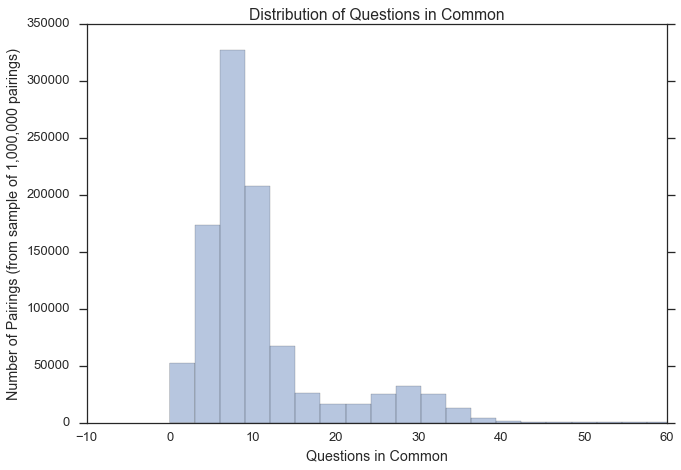

In [6]:
Q = Qincommon.values.ravel()

fig = sns.distplot(np.random.choice(Q,(1000000,)),bins=100,kde=False);
fig.set_xlim([-10,60])
fig.set_title('Distribution of Questions in Common')
fig.set_ylabel('Number of Pairings (from sample of 1,000,000 pairings)')
fig.set_xlabel('Questions in Common')

In [14]:
pd.DataFrame(np.random.choice(Q,(1000000,))).describe()

,0
count,1000000.000000
mean,12.044791
std,11.753866
min,0.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,301.000000


## Scaled Point Similarity Matrix

In [9]:
%reset_selective [df,X,R]

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [42]:
%reset_selective [KSubset]

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [43]:
whos

Variable    Type             Data/Info
--------------------------------------
Qincommon   DataFrame               0      1      2   <...>681 rows x 23681 columns]
df          DataFrame                      RID  gender<...>23681 rows x 716 columns]
fig         Figure           Figure(800x800)
n           int              20000
np          module           <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pca         RandomizedPCA    RandomizedPCA(copy=True, <...>state=None, whiten=False)
pd          module           <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>


In [11]:
KScaled = K.divide(Qincommon)
KScaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23671,23672,23673,23674,23675,23676,23677,23678,23679,23680
0,0.093427,-0.001976,0.007687,-0.000898,0.005672,-0.003999,-0.000029,0.006832,0.001143,0.000791,...,-0.001622,0.005598,-0.001138,0.004072,0.004393,0.001900,0.003584,0.012356,-0.001194,-0.007843
1,-0.001976,0.029468,0.001219,0.003445,0.001752,-0.000287,-0.000984,0.000000,-0.000962,-0.000077,...,-0.000640,-0.001744,-0.000530,-0.000176,-0.000199,-0.000135,0.002325,-0.001452,-0.002085,0.000000
2,0.007687,0.001219,0.263224,-0.015997,-0.000549,0.005933,-0.001774,0.000040,0.013046,-0.005640,...,0.004218,-0.001578,0.011894,-0.001177,-0.003666,-0.007321,-0.000172,0.016617,-0.001910,0.011810
3,-0.000898,0.003445,-0.015997,0.074857,-0.002832,-0.001318,0.003070,0.001820,-0.002910,-0.000089,...,-0.003403,-0.002831,-0.004750,0.000922,-0.003423,-0.006694,0.001304,-0.004287,0.006563,0.002812
4,0.005672,0.001752,-0.000549,-0.002832,0.214478,-0.005097,-0.001613,0.000306,-0.002455,-0.005198,...,0.002475,0.005927,0.003705,-0.002896,0.010115,-0.004033,0.001479,-0.015558,-0.009675,-0.007234


In [15]:
np.save('C:/Kscale.npy',KScaled.values)

In [2]:
KScaled = np.load('C:/Kscale.npy')

## Visualise Similarties and Differences

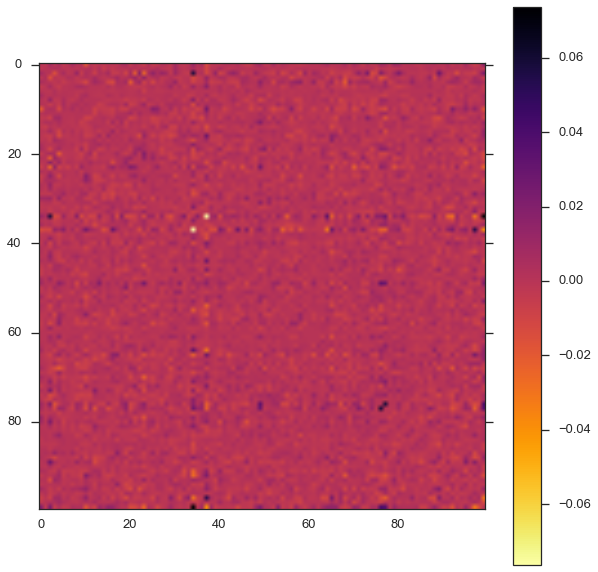

In [5]:
#KPlot = K.values[0:100,0:300]
n = 100 # number of people to compare in plot
KPlot = KScaled[0:n,0:n]
np.fill_diagonal(KPlot,0)
fig = plt.figure(figsize=(10,10))  # figure size in inches
plt.imshow(KPlot,cmap=plt.cm.inferno_r)
plt.colorbar()

Shows the covariance between pairs of users, divided by number of questions in common. 

In [3]:
from sklearn.decomposition import RandomizedPCA

In [7]:
KScaled.shape

(23681, 23681)

In [11]:
#n = 20000
#KSubset = KScaled.values[0:n,0:n]

pca = RandomizedPCA(n_components=50)
#pca.fit(KScaled)
#print(np.sum(pca.explained_variance_ratio_))

In [15]:
Kred = pca.fit_transform(KScaled[0:5000,:])

In [16]:
Kred.shape

(5000, 50)

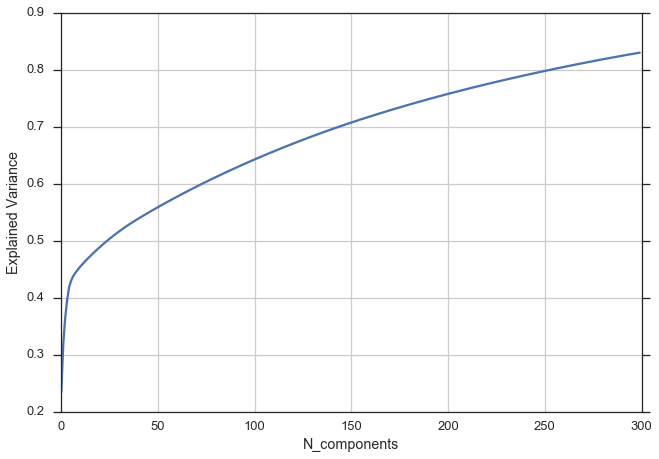

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('N_components')
plt.ylabel('Explained Variance')

In [14]:
KTransformed = pca.transform(KScaled)

In [20]:
KTransformed.shape

(23681, 300)

## Clustering

In [22]:
from sklearn.cluster.k_medoids_ import KMedoids

In [23]:
cluster = KMedoids(n_clusters=16)

In [24]:
cluster.fit(KTransformed)

KMedoids(clustering_method='pam', distance_metric='euclidean',
     init='heuristic', max_iter=300, n_clusters=16, random_state=None)

In [ ]:
b

In [9]:
Kred.shape

NameError: name 'Kred' is not defined

In [ ]:
from sklearn.

In [ ]:
whos